In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# import libraries and dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from sqlalchemy import Column, Integer, String, Float

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

Base = automap_base()
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

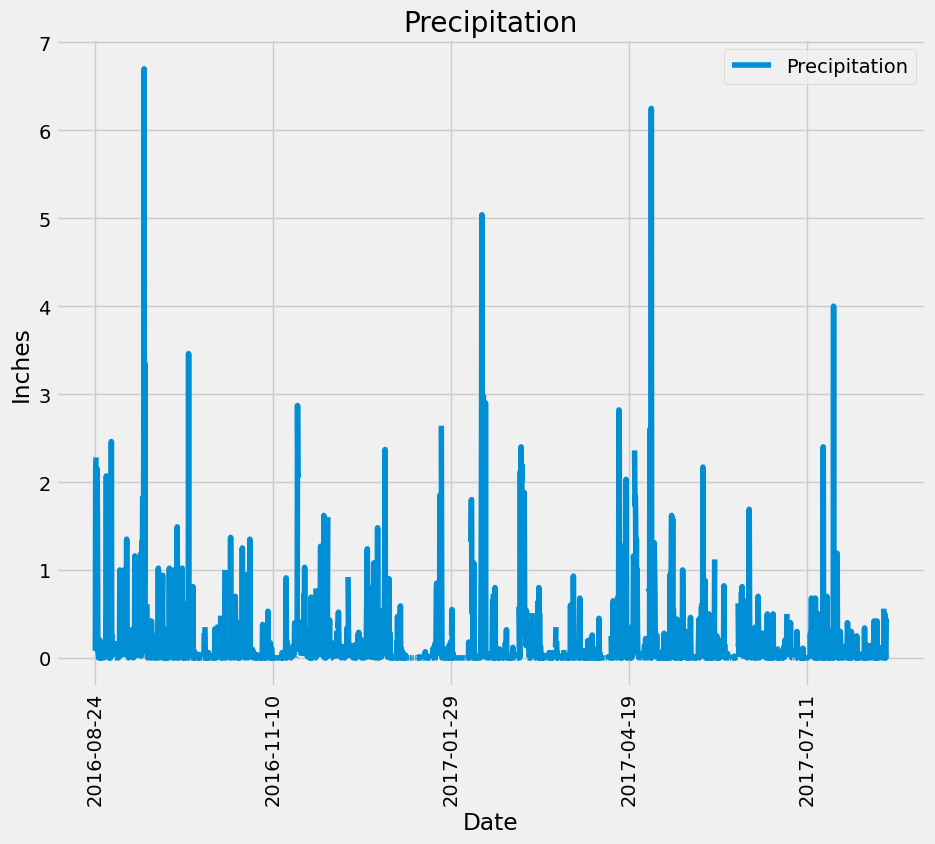

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
dataframe_a = (session.query(measurement.date, measurement.prcp).filter(measurement.date > year_ago).order_by(measurement.date).all())

# Save the query results as a Pandas DataFrame. Explicitly set the column names
dataframe_b = pd.DataFrame(dataframe_a, columns=["Date", "Precipitation"])

# Sort the dataframe by date
dataframe_b = dataframe_b.sort_values("Date").set_index("Date")

# Use Pandas Plotting with Matplotlib to plot the data
dataframe_b.plot(figsize = (10,8))
plt.xticks(rotation = 90)
plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.locator_params(axis='x',nbins=12)
plt.show()

plt.close()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
dataframe_b.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

<Axes: xlabel='Temperature (F)', ylabel='Frequency'>

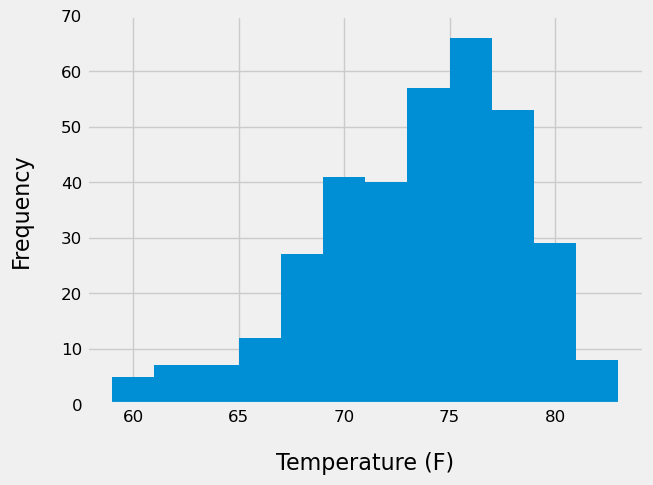

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
ann_tobs = session.query(measurement.date,measurement.tobs).\
    filter(
        measurement.date >= func.strftime("%Y-%m-%d",year_ago), 
        measurement.station == 'USC00519281'
    ).\
    order_by(measurement.date).all()

df = pd.DataFrame(ann_tobs, columns=['date', 'tobs'])

hist = df["tobs"].hist(bins=12)
plt.xlabel('Temperature (F)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency',fontsize=16,color='black',labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

hist


# Close Session

In [18]:
# Close Session
session.close()